# Building a Thought Summarization App

In this article I will show you how to build a simple app to transcribe and 
summarize recordings of rambling thoughts directly from an audio file or in realtime.

![](thoughts_map.png)

# Why Summarize Thoughts?

I often think about note taking, knowledge management, and topics that touch upon the topics of recording, transforming, and processing thoughts and ideas.

My interest in these topics is probably a mix of personal struggles with organizing my own thoughts, and partially related to my obsession with ever evolving

this ideal automation system for living, a sort of human learning automata that I often see myself becoming (in my wildest and childest dreams).

Now, as for the general importance of summarizing thoughts, I would argue the following. As far as bringing an idea into reality, the current methods we have to transcribe ultra fast flows

of thought are at best arcaic, they in no menas capture the speed and dynamics of the free flow nature of thinking, coming up with ideas and having them dance around in our minds.

Basically when we write by typing or hand writing, we slow everything down, which in one sense can be extremely beneficial, because it makes use reflect more carefully about what we are thinking, 
however on the other side, it does what it does, makes us think slower, at a rate that our brains dont want to tolerate.

If I am solving a hard problem I indeed want to be slower, and taking notes and slowing down is the very opposite of a hindrance, however for bringin flows of ideas to life, we need something better.

Its not new this idea of recording your thoughts, many writes have done it. The new thing is that we the advent of large language models like chatgpt, we now have amazing tools to allow us to navigate these thoughts more efficiently than ever before.

ONe can just think and record these thoughts as they are spoken, and then, have a set of models take care of the storing, processing and indexing of those thoughts to make them quickly avialable upon request at later time when inspiration calls.


So, let's look at how we could leverage current open source technologies plus Large Language Models made available by OpenAI, to build a tool to facilitate this workflow of streaming thoughts.


# Steps to Build a Thought Summarizer App

First things first, lets define the steps for building a thought summarization app.

1. Setup
2. Import dependencies
3. Record audio
4. Transcribe audio
5. Summarize transcribed text
6. Wrap everything into a streamlit app

Now, let's go through each of these steps in detail.

# Setup

For setting up this project we will need to.

1. **Install OS-level dependencies (ffmpeg)**
   
On Linux:

```sudo apt update && sudo apt install ffmpeg```

On MacOS

```brew install ffmpeg```

On Windows
```chco install ffmpeg```

2. **Create the conda environment**

```conda create -n thought_summarizer python==3.8```

3. Install Python dependencies (pytorch, whisper, pyaudio)

For installing pytorch, make sure that the cuda version is right for your machine.

```conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia```

Install Whisper:

```pip install git+https://github.com/openai/whisper.git -q```

Install Pyaudio
(On Linux do this first: 

```sudo apt install portaudio19-dev```

Then,
```pip install pyaudio```

and streamlit to wrap everything up into an app at the end.

2. Import dependencies:

Import whisper, pyaudio, wave and time.

In [1]:
import openai
import pyaudio
import whisper
import time
import wave

2023-01-28 16:48:17.770370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-28 16:48:18.307635: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-28 16:48:19.517290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lucassoares/anaconda3/pkgs/cudatoolkit-11.3.1-h2bc3f7f_2/lib/:/home/lucassoares/anaconda3/pkgs/cudatoolkit-11.3.1-h2bc3f7f_2/lib/
2023-01-28 16:48:19.517421: W tensorflow/stream_executor/platform/default/d

3. Record audio:

Use PyAudio to open a stream and record audio for a specified amount of time and
save the recorded audio as a wav file.

In [11]:
CHANNELS = 1
FORMAT = pyaudio.paInt16
RATE = 44100
CHUNK = 1024
# Record for 20 seconds
time_recording = 20

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
print("Start recording")
frames = []

seconds = 10
for i in range(0, int(RATE / CHUNK * seconds)):
    data = stream.read(CHUNK)
    frames.append(data)
    

print("Recording stopped")
stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("output.wav", "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

Start recording
Recording stopped


5. Transcribe audio:

Load a base model using `whisper.load_model()`, use the model to transcribe the recorded audio file and optionally write the transcribed text to a text file.

In [7]:
# Load the whisper model
model = whisper.load_model("base.en")

In [15]:
write_text_file = False
audio_file_path = "./output.wav"

result = model.transcribe(audio_file_path)
if write_text_file==True:    
    with open("captions.txt", "w+") as f:
        f.write(result["text"])

print(result["text"])

Okay, so the idea in itself is to write a thought summarization app. Now what does that mean? That means that I would have this free flow inputs train, right? And I would just ramble on on different ideas that I want to do, maybe just a specific idea, right? And I would just talk and talk about what the idea is. And in the end, what I would do is I would use a script to do what I'm doing right now, which is to record myself. Ideally would be in real time, but in the essence it would be recording myself, talking about this idea. And then generate, like, imagine note taking as just creating a set of audio files that are fed into a model that processes them and then gives me back a summary of those thoughts. In this way, I would not have to waste time, you know, rambling through notes, going through notes, I can just talk to the computer all day long. And then ask the computer to give me, let's say, you know, a summary of my notes for today. Even I can do, like, specific stuff. I can do a summary of my notes for date X, date Y, a summary of my notes about topic ABC or D. I mean, this could be expanded into some pretty cool ways. And then, and then what I would get at the output is I would use whisper to do what it's doing right now, which is to do speech to text and then use a good text summarizer like Judge PD, JAPT3, etc. whatever to summarize those thoughts, maybe create bullet points and stuff. Now, I mean, this idea is obviously no, I knew people are already talking to Judge PD, but in essence, that's what I want to write about. And hopefully I'll do a video in an article about this topic during the weekend where I can elaborate, you know, write the code and stuff and try to get this idea out there. And that's pretty much it. What I want to do for this weekend.

6. Summarize transcribed text:

Use GPT-3 or the ChatGPT demo (API coming soon!) to summarize the transcribed text and extract key thoughts. 

Below I show the output using the ChatGPT demo:

![](2023-01-26-19-14-30.png)

And now, let's look at the GPT-3 output using the official OpenAI API.

In [3]:
# Apply the API key
openai.api_key = "YOUR API KEY"

# Define the prompt for GPT-3
#text = result["text"]
text = """Okay, so the idea in itself is to write a thought summarization app. Now what does that mean? That means that I would have this free flow inputs train, right? And I would just ramble on on different ideas that I want to do, maybe just a specific idea, right? And I would just talk and talk about what the idea is. And in the end, what I would do is I would use a script to do what I'm doing right now, which is to record myself. Ideally would be in real time, but in the essence it would be recording myself, talking about this idea. And then generate, like, imagine note taking as just creating a set of audio files that are fed into a model that processes them and then gives me back a summary of those thoughts. In this way, I would not have to waste time, you know, rambling through notes, going through notes, I can just talk to the computer all day long. And then ask the computer to give me, let's say, you know, a summary of my notes for today. Even I can do, like, specific stuff. I can do a summary of my notes for date X, date Y, a summary of my notes about topic ABC or D. I mean, this could be expanded into some pretty cool ways. And then, and then what I would get at the output is I would use whisper to do what it's doing right now, which is to do speech to text and then use a good text summarizer like Judge PD, JAPT3, etc. whatever to summarize those thoughts, maybe create bullet points and stuff. Now, I mean, this idea is obviously no, I knew people are already talking to Judge PD, but in essence, that's what I want to write about. And hopefully I'll do a video in an article about this topic during the weekend where I can elaborate, you know, write the code and stuff and try to get this idea out there. And that's pretty much it. What I want to do for this weekend."""
prompt = (f"summarize this text: {text}")

# Get a response from GPT-3
response = openai.Completion.create(
    engine="text-davinci-003",
    prompt=prompt,
    max_tokens=1024,
    n =1,
    stop=None,
    temperature=0.5
)

# Get the summary from the response
summary = response.choices[0].text

# Print the summary
print(summary)




This text describes an idea for a thought summarization app that would record a user's thoughts and then use a model to generate a summary. The output would be a set of bullet points generated by a text summarizer like Judge PD or JAPT3. The author plans to write code and create a video and article about this idea over the weekend.


As expected the summary produced by ChatGPT is far superior, but overall,
the summary provided by both is quite usable.

7. Wrap everything into a streamlit app

As for the final step, this could be organizing these chunk thoughts into 
a database so that one could easily search them.  

In [ ]:
import streamlit as st
import whisper
import pyaudio
import wave
import openai


openai.api_key = "YOUR API KEY"
st.title("Thought Summarization App")

model = whisper.load_model("base")

st.write("Whisper Model Loaded!")

# upload audio file with streamlit
# audio_file = st.file_uploader("Upload Audio", type=["wav", "mp3", "m4a"])

CHANNELS = st.sidebar.number_input(label="Channels")
FORMAT = pyaudio.paInt16
RATE = st.sidebar.number_input(label="Rate")
CHUNK = st.sidebar.number_input(label="Chunk")
THOUGHT_DELAY = st.sidebar.number_input(label="Thought Delay (s)")
temp_audio_file_path = "./audo_sample.m4a"

if st.sidebar.button("Record Audio"):
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
    print("Recording thoughts...")
    frames = []


    for i in range(0, int(RATE / CHUNK * THOUGHT_DELAY)):
        data = stream.read(CHUNK)
        frames.append(data)
        

    print("Recording stopped. Now starting transcription...")
    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(temp_audio_file_path, "wb")
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
    
if st.sidebar.button("Transcribe/Summarize Audio"):
    result = model.transcribe(temp_audio_file_path)
    st.write("Thought Summaries:")
    text = result["text"]
    prompt = (f"summarize this text: {text}")

    # Get a response from GPT-3
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=1024,
        n =1,
        stop=None,
        temperature=0.5
    )

    # Get the summary from the response
    summary = response.choices[0].text

    # Print the summary
    st.write(summary)

    #st.write(result["text"])

This code uses the Streamlit, Whisper, PyAudio, Wave, and OpenAI libraries
It creates a "Thought Summarization App" with a Streamlit interface
The Whisper library is used to load a "base" model for transcribing audio
The PyAudio, Wave, and OpenAI libraries are used to record audio, transcribe it with the Whisper model, and summarize it using OpenAI's GPT-3 model
The user can input the number of channels, rate, and chunk size for recording audio, as well as the thought delay time in seconds
The user can also record audio and transcribe/summarize it using buttons in the sidebar
The transcribed and summarized text is displayed in the Streamlit interface.

**The prose version:**

This code creates a "Thought Summarization App" that uses a variety of libraries to transcribe and summarize audio recordings. The Streamlit library is used to create a user interface, while the Whisper, PyAudio, Wave, and OpenAI libraries are used for various aspects of audio processing. The Whisper library is used to load a "base" model for transcribing audio, while the PyAudio, Wave, and OpenAI libraries are used to record audio, transcribe it with the Whisper model, and summarize it using OpenAI's GPT-3 model. The user can input the number of channels, rate, and chunk size for recording audio, as well as the thought delay time in seconds. The user can also record audio and transcribe/summarize it using buttons in the sidebar. The transcribed and summarized text is displayed in the Streamlit interface.

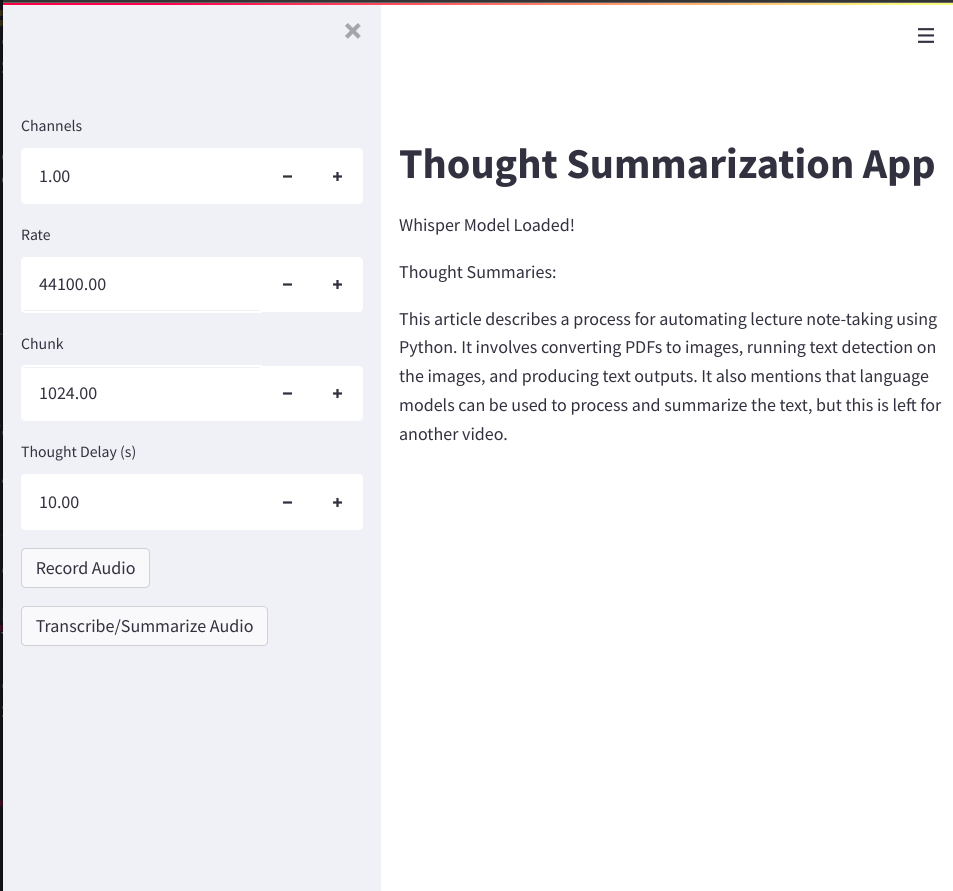

8. Conclusion:

Summarize the steps taken to build the thought summarization app
Explain the key takeaways and any future work to be done


Remaining tasks:
- Using ChatGPT to suggest actionable things based on thoughts and notes. Something like "based of these notes I wrote" what you think I should write about next weekend that would encapsulate some of these ideas?